In [1]:
import glob
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def read_results():
    dfs = []
    for fn in glob.glob('results/*.json'):
        dfs.append(pd.read_json(fn, lines=True))
    return pd.concat(dfs)
df = read_results()

In [3]:
df

,solver,solution,optimal,time,problem,times,machines,ortools_best,epoch
0,ortools_benchmark,55,True,0.012517,taillard_ft_06,6,6,NaN,NaN
0,ortools_benchmark,930,True,2.418531,taillard_ft_10,10,10,NaN,NaN
0,demo_mealpy_bv,101,NaN,0.667532,taillard_ft_06,6,6,55.0,"[101.0, 101.0, 101.0]"
0,demo_mealpy_bv,2795,NaN,6.014715,taillard_ft_10,10,10,930.0,"[3239.0, 3239.0, 2795.0]"
0,demo_mealpy_bv,4198,NaN,5.848228,taillard_abz_5,10,10,1234.0,"[4198.0, 4198.0, 4198.0]"
0,ortools_benchmark,1234,True,1.228277,taillard_abz_5,10,10,NaN,NaN


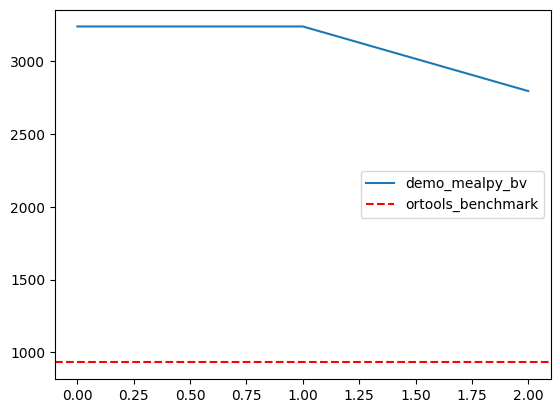

In [4]:
def compare_algs_for_problem(df):
    # plot values for each epoch
    # ax  
    fig, ax = plt.subplots()
    for name, grp in df[['solver', 'epoch']].dropna().explode('epoch', ignore_index=True).groupby('solver'):
        grp.epoch.plot(ax=ax, label=name)
    
    # plot results w/o epoch
    for label, data in df[df.epoch.isna()].groupby('solver'):
        ax.axhline(y=data.solution.min(), label=label, xmin=0, xmax=plt.xlim()[1], linestyle='--', color='red')
    ax.legend()
    fig.show()
   
compare_algs_for_problem(df[df.problem == 'taillard_ft_10'])